### Model of learning state transitions

$S$ = States

$A$ = Actions

$\eta_{positive}$ = Learning rate for state transitions paired with positive stimulus

$\eta_{negative}$ = Learning rate for state transitions paired with negative stimulus

$\eta_{neutral}$ = Learning rate for state transitions paired with neutral stimulus

$O$ = Observed state 

$V$ = $P(S_{next}|A_{i},S_{current})$

$V_{i+1}=V_{i} + \eta \cdot (O-V_{i})$

['threat', 'threat', 'threat', 'threat', 'threat', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


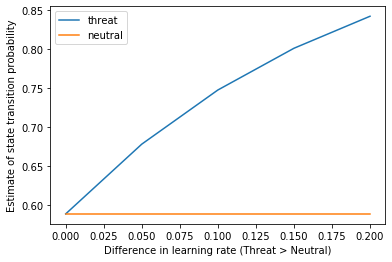

In [75]:
import numpy as np
from random import shuffle
import seaborn as sns
import matplotlib.pyplot as plt


#pre-determined outcomes reflect latent transition probabilities
action1_outcomes=np.ones((4)).tolist()+np.zeros((6)).tolist()
shuffle(action1_outcomes) #randomize sequence
action2_outcomes=np.ones((6)).tolist()+np.zeros((4)).tolist()
shuffle(action2_outcomes) #randomize sequence

#starting values
value1=0.5
value2=0.5

#learning rates
eta_neutral=0.1
e_t=[0.1,0.15,0.2,0.25,0.3]
ending_values_threat=[]
ending_values_neutral=[]

for eta_threat in e_t:

    # In the models below, I assume threat precedes common transitions
    # Learn values for action 1
    # When learning rate is equal between neutral and threat
    for trial in range(len(action1_outcomes)):
        current_outcome=action1_outcomes[trial]
        value1=value1+eta_neutral*(current_outcome-value1)

#     print('value 1 after undistorted learning: {}'.format(value1))

    #learning rate is faster for threat relative to neutral
    #re-set State-Prediction estimate
    value1=0.5

    for trial in range(len(action1_outcomes)):
        current_outcome=action1_outcomes[trial]
        if current_outcome==0:
            value1=value1+eta_threat*(current_outcome-value1)
        else:
            value1=value1+eta_neutral*(current_outcome-value1)
#     print('value 1 after learning is boosted for threat transitions: {}'.format(value1))

    #learn values for action 2
    # When learning rate is equal between neutral and threat
    value2=0.5
    for trial in range(len(action2_outcomes)):
        current_outcome=action2_outcomes[trial]
        value2=value2+eta_neutral*(current_outcome-value2)
    ending_values_neutral.append(value2)
    
    #learning rate is faster for threat relative to neutral
    # re-set state prediction estimate
    value2=0.5
    for trial in range(len(action2_outcomes)):
        current_outcome=action2_outcomes[trial]
        if current_outcome==1:
            value2=value2+eta_threat*(current_outcome-value2)
        else:
            value2=value2+eta_neutral*(current_outcome-value2)
#     print('value 2 after learning is boosted for threat transitions: {}'.format(value2))
    ending_values_threat.append(value2)

ending_all=ending_values_threat+ending_values_neutral #concatenate all resultant SP values
labels=['threat']*5+['neutral']*5
print(labels)
lrs=(e_t*2)
lrs=[x-0.1 for x in lrs]
    
ax=sns.lineplot(y=ending_all,x=lrs,hue=labels)
ax.set_xlabel('Difference in learning rate (Threat > Neutral)')
ax.set_ylabel('Estimate of state transition probability')
plt.show()